In [23]:
import os
import numpy as np
import pandas as pd
import urllib
import zipfile
import xmltodict

DATA_PATH = "./German-Political-Speeches-Corpus"

REMOTE_DATASET = "Bundesregierung.xml"
xml_path = os.path.join(DATA_PATH, REMOTE_DATASET) 
with open(xml_path, mode="rb") as file:
    xml_document = xmltodict.parse(file)
    text_nodes = xml_document['collection']['text']
    df = pd.DataFrame({'person' : [t['@person'] for t in text_nodes],
                        'speech' : [t['rohtext'] for t in text_nodes],
                        'date': [t['@datum'] for t in text_nodes]})

In [25]:
df["du_count"] = df.apply(lambda x: sum([i.lower().split().count('du') for i in x if isinstance(i, str)]), axis=1)
df["sie_count"] = df.apply(lambda x: sum([i.lower().split().count('sie') for i in x if isinstance(i, str)]), axis=1)
df["year"] = df.date.str[:4].astype(int)
df = df.groupby('year', as_index=False)[['sie_count', "du_count"]].sum()
df.to_csv("./german_sie_du_counts.csv", index=False)

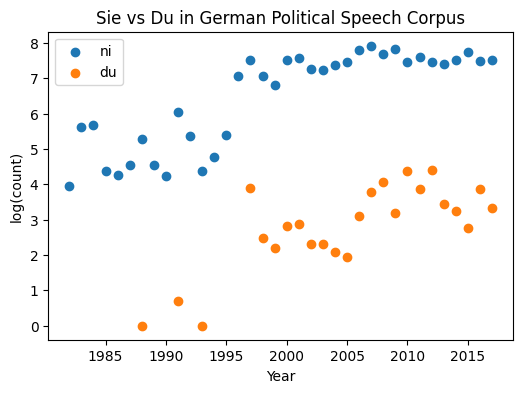

In [32]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(figsize=(6, 4))


ax.scatter(x=df.year, y=np.log(df.sie_count), label='ni')
ax.scatter(x=df.year, y=np.log(df.du_count), label='du')
plt.legend()
ax.set_xlabel("Year")
ax.set_ylabel("log(count)")

ax.set_title('Sie vs Du in German Political Speech Corpus')
plt.show()

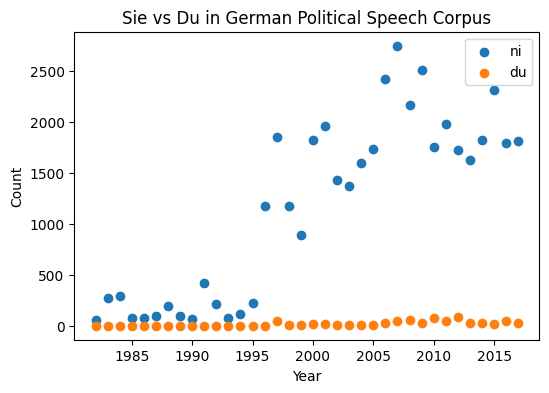

In [33]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(figsize=(6, 4))


ax.scatter(x=df.year, y=df.sie_count, label='ni')
ax.scatter(x=df.year, y=df.du_count, label='du')
plt.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Count")

ax.set_title('Sie vs Du in German Political Speech Corpus')
plt.show()